Cada coluna (feature) no conjunto de dados representa uma característica de cada passageiro a bordo.

PassengerId: Um identificador único para cada passageiro.

Survived: O principal dado de resultado. Indica se o passageiro sobreviveu (1) ou não (0).

Pclass: A classe do bilhete do passageiro. É uma variável categórica que pode indicar a classe social ou econômica (1 = Primeira Classe, 2 = Segunda Classe, 3 = Terceira Classe).

Name: O nome completo do passageiro.

Sex: O sexo do passageiro (masculino ou feminino).

Age: A idade do passageiro em anos. Esta coluna é a principal que contém valores ausentes.

SibSp: O número de irmãos/cônjuges a bordo com o passageiro.

Parch: O número de pais/filhos a bordo com o passageiro.

Ticket: O número do bilhete do passageiro.

Fare: O valor da tarifa paga pelo bilhete.

Cabin: O número da cabine do passageiro. Esta coluna contém uma grande quantidade de valores ausentes.

Embarked: O porto de embarque do passageiro. Os portos são identificados por letras: C = Cherbourg, Q = Queenstown, S = Southampton. Esta coluna também pode ter valores ausentes.

## Informações Extras


Sendo você um gestor de seguro que assegurou o Titanic, qual o tipo de informação seria importante extrair dessa base de dados que o ajudaria a observar algum tipo de fraude.

1. Rastreamento por Bilhete (Ticket)

Informação a ser analisada: A coluna Ticket e, em particular, a quantidade de pessoas associadas a cada bilhete.

Análise de Fraude: Fraudes de seguro podem envolver pessoas que não estavam a bordo, mas que reivindicam um bilhete para receber indenização. Eu cruzaria os dados de todos os bilhetes associados a uma mesma família ou grupo e verificaria se o número de sobreviventes declarados corresponde ao número de passageiros que realmente embarcaram com aquele bilhete. Se houver discrepância — como uma família inteira declarada como morta, mas com um ou mais membros aparecendo em listas de sobreviventes — isso seria um alerta.

2. Padrões de Sobrevivência Inconsistentes

Informação a ser analisada: As colunas Survived, Age, Sex e Pclass.

Análise de Fraude: O padrão de sobrevivência no Titanic é bem conhecido: mulheres, crianças e passageiros da Primeira Classe tiveram taxas de sobrevivência muito maiores. Eu criaria relatórios para identificar:

Homens que sobreviveram: Se um homem da Terceira Classe, que teve as menores chances de sobrevivência, for listado como morto em uma reivindicação de seguro, mas aparecer como sobrevivente em outras listas ou testemunhos, isso levantaria uma bandeira vermelha.

Discrepâncias de Idade: A idade (Age) é um dado crucial. Um passageiro idoso ou uma criança pequena, que teriam mais dificuldade para chegar aos botes salva-vidas, mas que são reivindicados como sobreviventes por um familiar, mereceriam uma investigação mais detalhada. A fraude poderia estar na reivindicação do seguro de um passageiro que de fato morreu, mas cuja identidade é assumida por um sobrevivente para obter indenizações duplas ou indevidas.

3. Análise da Cabine e Fatores de Risco (Cabin e Pclass)

Informação a ser analisada: As colunas Cabin e Pclass.

Análise de Fraude: O valor do seguro de um passageiro da Primeira Classe seria muito maior do que o de um da Terceira Classe. A coluna Cabin, embora com muitos valores ausentes, pode ser usada para cruzar informações. Uma reivindicação de seguro de alto valor para um passageiro que, segundo os registros, estava na Terceira Classe ou em uma cabine que não correspondia a um bilhete de Primeira Classe, seria um forte indício de fraude.



In [6]:
%pip install pandas matplotlib seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de Estilo "Diferente" (Visual mais limpo)
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Carregar Dados
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# LIMPEZA E PRÉ-PROCESSAMENTO (Conforme solicitado)

# Remover duplicatas
df_limpo = df.drop_duplicates()

# Tratar valores nulos
# Idade: preenche com a mediana (menos sensível a outliers)
df_limpo = df_limpo.assign(Age=df_limpo['Age'].fillna(df_limpo['Age'].median()))

# Embarked: preenche com a moda (valor mais comum)
moda_embarked = df_limpo['Embarked'].mode()[0]
df_limpo = df_limpo.assign(Embarked=df_limpo['Embarked'].fillna(moda_embarked))

print("Dados limpos e pré-processados com sucesso!")
print(f"Linhas restantes: {len(df_limpo)}")

Dados limpos e pré-processados com sucesso!
Linhas restantes: 891


Passageiros da 1ª classe que não sobreviveram: 80
Porcentagem em relação ao total da 1ª classe: 37.04%


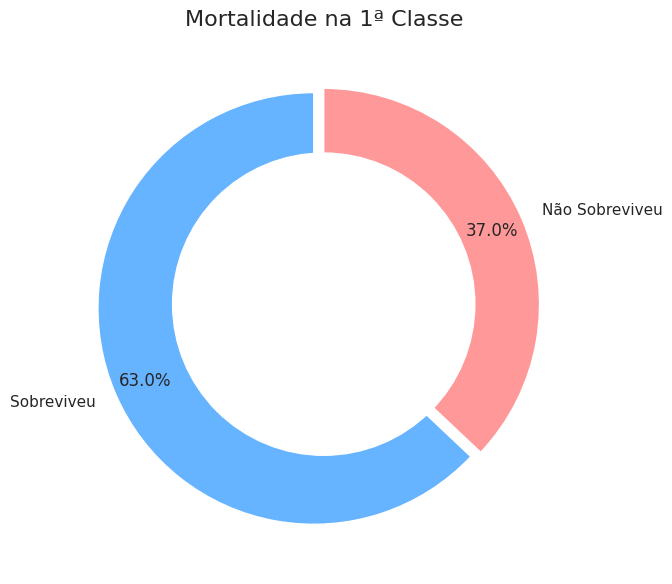

In [12]:
# Filtro: 1ª Classe
total_1a_classe = df_limpo[df_limpo['Pclass'] == 1]
nao_sobreviventes_1a = total_1a_classe[total_1a_classe['Survived'] == 0]

# Cálculo da porcentagem
porcentagem = (len(nao_sobreviventes_1a) / len(total_1a_classe)) * 100

print(f"Passageiros da 1ª classe que não sobreviveram: {len(nao_sobreviventes_1a)}")
print(f"Porcentagem em relação ao total da 1ª classe: {porcentagem:.2f}%")

# Gráfico de Rosca
labels = ['Sobreviveu', 'Não Sobreviveu']
sizes = [len(total_1a_classe) - len(nao_sobreviventes_1a), len(nao_sobreviventes_1a)]
colors = ['#66b3ff', '#ff9999'] # Azul e Vermelho suave

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=(0.05, 0))

# Desenhar círculo branco no meio para transformar pizza em rosca
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Mortalidade na 1ª Classe', fontsize=16)
plt.tight_layout()
plt.show()

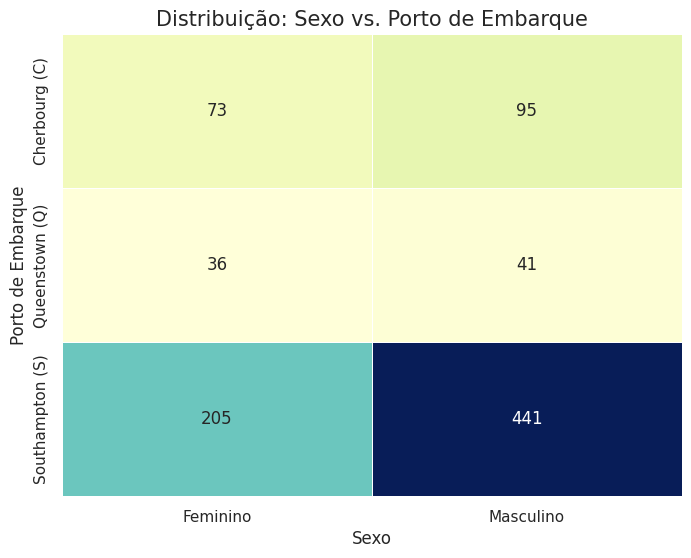

In [9]:
# Tabela cruzada para contagem
crosstab = pd.crosstab(df_limpo['Embarked'], df_limpo['Sex'])
# Renomeando para ficar mais bonito
crosstab.index = ['Cherbourg (C)', 'Queenstown (Q)', 'Southampton (S)']
crosstab.columns = ['Feminino', 'Masculino']

# Gráfico Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidths=.5)

plt.title('Distribuição: Sexo vs. Porto de Embarque', fontsize=15)
plt.ylabel('Porto de Embarque')
plt.xlabel('Sexo')
plt.show()

Média de idade (Sobreviventes): 28.3 anos
Média de idade (Não Sobreviventes): 30.0 anos


/tmp/ipykernel_20914/3957519678.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_limpo, x='Survived', y='Age', palette="muted", split=True)


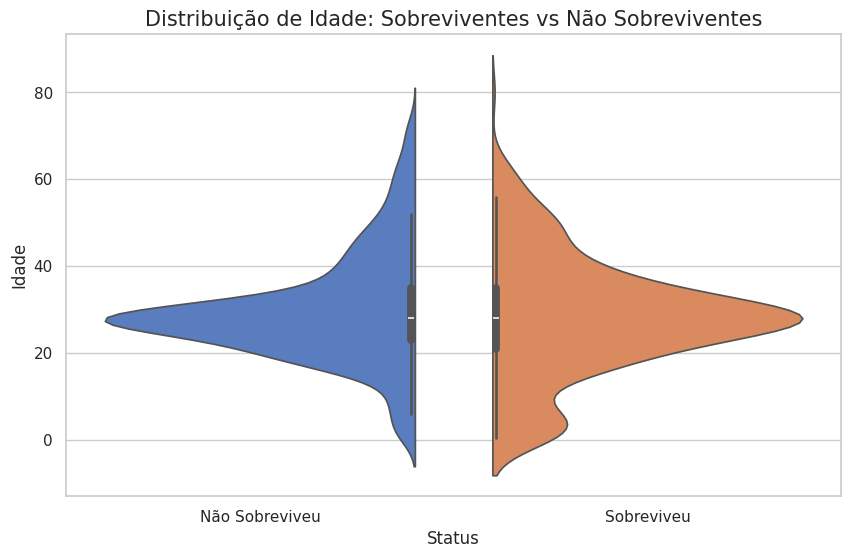

In [13]:
# Cálculo das médias
media_sobreviventes = df_limpo[df_limpo['Survived'] == 1]['Age'].mean()
media_nao_sobreviventes = df_limpo[df_limpo['Survived'] == 0]['Age'].mean()

print(f"Média de idade (Sobreviventes): {media_sobreviventes:.1f} anos")
print(f"Média de idade (Não Sobreviventes): {media_nao_sobreviventes:.1f} anos")

# Gráfico Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_limpo, x='Survived', y='Age', palette="muted", split=True)

plt.title('Distribuição de Idade: Sobreviventes vs Não Sobreviventes', fontsize=15)
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
plt.ylabel('Idade')
plt.xlabel('Status')
plt.show()